## To what extent do administrative and legal hurdles affect the effective number of parties?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv", sep=";")

<BarContainer object of 1484 artists>

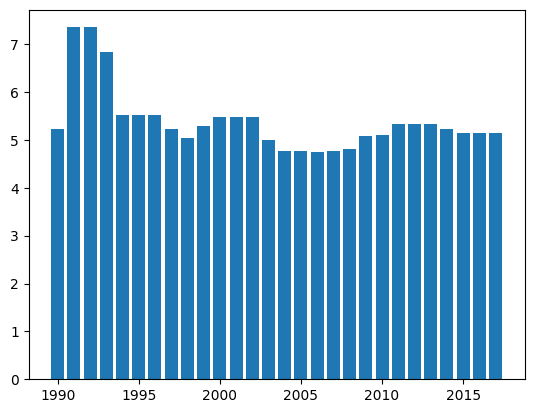

In [3]:
years = df["Year"]
eff_parties = df["Enep"]
plt.bar(years,eff_parties)

In [4]:
most_parties = df[["Country", "Year", "Enep"]].nlargest(20, "Enep")
print(most_parties)

                 Country  Year      Enep
1037              Poland  1991  7.351249
1038              Poland  1992  7.351249
1039              Poland  1993  6.831489
1040              Poland  1994  5.527090
1041              Poland  1995  5.527090
1042              Poland  1996  5.527090
94               Belgium  2000  5.481879
95               Belgium  2001  5.481879
96               Belgium  2002  5.481879
105              Belgium  2011  5.337314
106              Belgium  2012  5.337314
107              Belgium  2013  5.337314
133   Bosnia-Herzegovina  2011  5.292198
134   Bosnia-Herzegovina  2012  5.292198
135   Bosnia-Herzegovina  2013  5.292198
93               Belgium  1999  5.287010
86               Belgium  1992  5.239627
87               Belgium  1993  5.239627
88               Belgium  1994  5.239627
136   Bosnia-Herzegovina  2014  5.231657


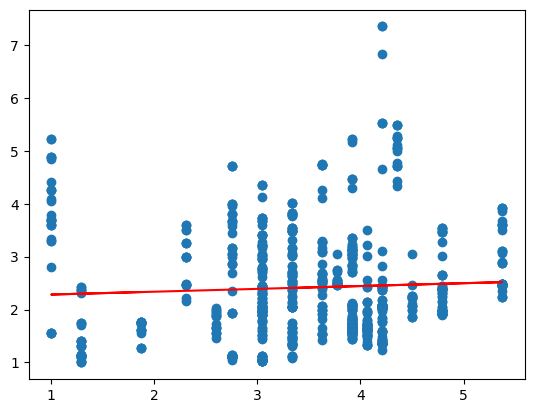

In [5]:


df_clean = df[["Adminhurd", "Enep"]].dropna()

admin_hurdles = df_clean["Adminhurd"]
effective_parties = df_clean["Enep"]

m, b = np.polyfit(admin_hurdles, effective_parties, 1)

plt.plot(admin_hurdles, m*admin_hurdles + b, color='red')
plt.scatter(admin_hurdles , effective_parties)



## Does electoral distortion reduce the number of effective parties?

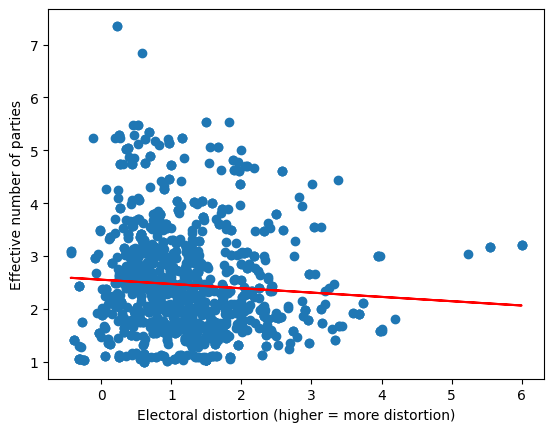

In [6]:
df_clean = df[["REP_SR3", "Enep"]].dropna()

x = df_clean["REP_SR3"] * -1 + 7
effective_parties = df_clean["Enep"]

m, b = np.polyfit(x, effective_parties, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel("Electoral distortion (higher = more distortion)")
plt.ylabel("Effective number of parties")
plt.scatter(x, effective_parties)

In [7]:
print(df[["Country", "Year", "REP_SR3"]].loc[df["REP_SR3"] > 1].nsmallest(10, columns="REP_SR3"))

              Country  Year   REP_SR3
16            Albania  2006  1.445144
17            Albania  2007  1.445144
18            Albania  2008  1.445144
960   North Macedonia  1998  1.769715
254           Croatia  1992  2.813239
1402   United Kingdom  1992  2.987284
1406   United Kingdom  1996  2.987703
1403   United Kingdom  1993  3.023632
1404   United Kingdom  1994  3.023632
1405   United Kingdom  1995  3.023632


## Historical composition of Albanias election system
<img src="images/albania_parliament.png" alt="albania" width="800"/>

## Albanias election reforms

- For the 2009 election, several constitutional reforms changed the election law ([Bertelsmann](https://www.kas.de/de/einzeltitel/-/content/parlamentswahlen-2009-in-albanien1))
- We find that this actually reduced electoral distortion!

In [19]:
print(df[["Country", "Year", "REP_SR3"]][(df["Country"] == "Albania") & (df["Year"] >= 2008)])

    Country  Year   REP_SR3
18  Albania  2008  1.445144
19  Albania  2009  3.801318
20  Albania  2010  6.044092
21  Albania  2011  6.044092
22  Albania  2012  6.044092
23  Albania  2013  6.267091
24  Albania  2014  6.468023
25  Albania  2015  6.468023
26  Albania  2016  6.468023
27  Albania  2017  6.650095


## 
![Albanien_2006](images/albania_parliament.png)




## Does electoral openness increase the amount of effective parties?

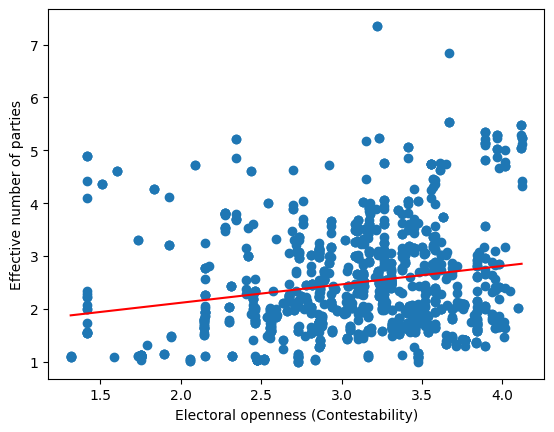

In [ ]:
clean_df = df[["CO_OPEN1", "CO_OPEN3", "Enep"]].dropna()


x = (clean_df["CO_OPEN1"] + clean_df["CO_OPEN3"]) / 2
y = clean_df["Enep"]

m1, b = np.polyfit(x,y,1)

x_line = np.linspace(x.min(), x.max(), 100)
#y_line = m1*x_line**2 + m2*x_line + b
y_line = m1*x_line + b

plt.plot(x_line, y_line, color="red")

plt.xlabel("Electoral openness (Contestability)")
plt.ylabel("Effective number of parties")

plt.scatter(x,y)
